In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Logistic Regression

In [2]:
df1 = pd.read_csv("D:\Data Science\datasets\Other datasets\Adult.csv")

In [3]:
df1.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df1.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
df1.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [6]:
df1 = pd.get_dummies(df1, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country'])

X = df1[['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week'] + list(df1.columns[df1.columns.str.startswith('workclass_')])]
y = df1['income']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [8]:
logreg = LogisticRegression(max_iter = 200, solver='liblinear')

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [9]:
print(confusion_matrix(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
lr = accuracy
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

[[7256  237]
 [1723  553]]
Accuracy: 0.7993653393387246
              precision    recall  f1-score   support

       <=50K       0.81      0.97      0.88      7493
        >50K       0.70      0.24      0.36      2276

    accuracy                           0.80      9769
   macro avg       0.75      0.61      0.62      9769
weighted avg       0.78      0.80      0.76      9769



# KNN Classification

In [10]:
df2 = pd.read_csv("D:\Data Science\datasets\Other datasets\Adult.csv")

In [11]:
df2 = pd.get_dummies(df2, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country'])

X = df2[['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week'] + list(df2.columns[df2.columns.str.startswith('workclass_')])]
y = df2['income']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [13]:
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
y_pred = classifier.predict(X_test)

In [15]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6785  608]
 [1597  779]]
              precision    recall  f1-score   support

       <=50K       0.81      0.92      0.86      7393
        >50K       0.56      0.33      0.41      2376

    accuracy                           0.77      9769
   macro avg       0.69      0.62      0.64      9769
weighted avg       0.75      0.77      0.75      9769



In [16]:
knn = classifier.score(X_test, y_test)
print(knn)

0.7742860067560651


# Decision Tree

In [17]:
df3 = pd.read_csv("D:\Data Science\datasets\Other datasets\Adult.csv")

In [18]:
df3 = pd.get_dummies(df3, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country'])

X = df3[['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week'] + list(df3.columns[df3.columns.str.startswith('workclass_')])]
y = df3['income']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [20]:
classifier = DecisionTreeClassifier(criterion = "gini")

In [21]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
y_pred = classifier.predict(X_test)

In [23]:
accuracy = accuracy_score(y_test, y_pred)
dt = accuracy
print('Accuracy:', accuracy)

Accuracy: 0.7849319275258471


In [24]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6367 1106]
 [ 995 1301]]
              precision    recall  f1-score   support

       <=50K       0.86      0.85      0.86      7473
        >50K       0.54      0.57      0.55      2296

    accuracy                           0.78      9769
   macro avg       0.70      0.71      0.71      9769
weighted avg       0.79      0.78      0.79      9769



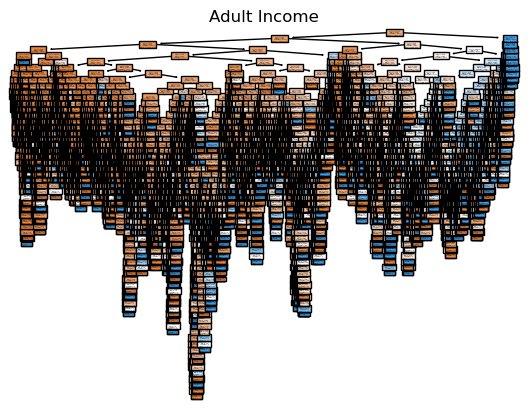

In [25]:
from sklearn.tree import plot_tree

plt.figure()
plot_tree(classifier, filled=True)
plt.title("Adult Income")
plt.show()

# Support Vector Classification

In [26]:
df4 = pd.read_csv("D:\Data Science\datasets\Other datasets\Adult.csv")

In [27]:
df4 = pd.get_dummies(df4, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country'])

X = df4[['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week'] + list(df4.columns[df4.columns.str.startswith('workclass_')])]
y = df4['income']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [29]:
X_train = X_train[:200]
y_train = y_train[:200]
X_test = X_test[:200]
y_test = y_test[:200]

In [30]:
svc = SVC(C=1.0, kernel = 'linear')

In [31]:
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [32]:
y_pred = svc.predict(X_test)

In [33]:
accuracy = accuracy_score(y_test, y_pred)
sv = accuracy
print('Accuracy:', accuracy)

Accuracy: 0.815


In [34]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[140   4]
 [ 33  23]]
              precision    recall  f1-score   support

       <=50K       0.81      0.97      0.88       144
        >50K       0.85      0.41      0.55        56

    accuracy                           0.81       200
   macro avg       0.83      0.69      0.72       200
weighted avg       0.82      0.81      0.79       200



# Comparison

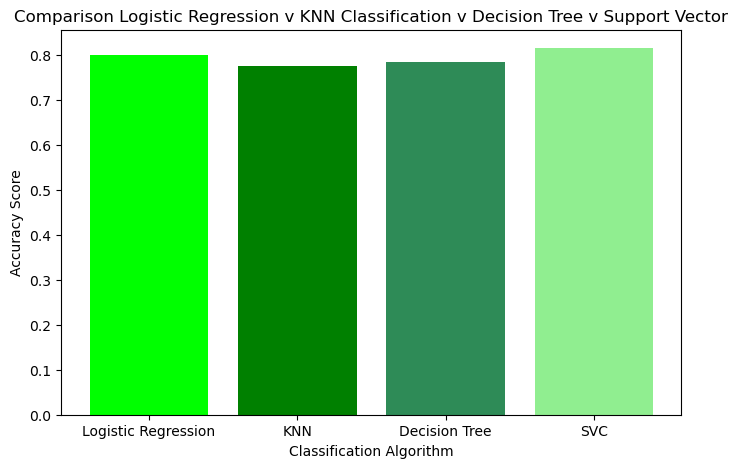

In [35]:
fig = plt.figure(figsize = (8, 5))
bar_labels = ['Logistic Regression', 'KNN', 'Decision Tree', 'SVC']
bar_values = [lr, knn, dt, sv]

plt.bar(bar_labels, bar_values, color=['lime', 'green', 'seagreen', 'lightgreen'])

plt.xlabel('Classification Algorithm')
plt.ylabel('Accuracy Score')
plt.title("Comparison Logistic Regression v KNN Classification v Decision Tree v Support Vector")

plt.show()